<H1 style="color:SlateBlue;"> Grip: The Spark Foundation </H1>

<b> Data Science and Business Analytics Internship </b>

<B> Task Three: Exploratory Data Analysis - Retail </B>

<b> Author : Sahil Kavitake </b>

<H3 style="color:SlateBlue;"> Trying to find weak areas of business using Exploratory Data Analysis:</H3>

<p><b> Here we are taking the role of Business manager and trying to find weak areas of our business where we can work more to make more profit. We will perform exploratory data analysis on the data we have, observe our results and draw conclusion from that.</b> </p>

<h2 style="color:purple;"><B>Loading, Viewing, and Cleaning the Dataset</B> </h2>

<H4 style="color:Crimson;"><li> Loading Required Python Libraries</li> </H4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Libraries loaded!")

Libraries loaded!


<h4 style="color:Crimson;"><li> Now Let us Read and Explore the Dataset</li> </h4>

In [2]:
data = pd.read_csv(r"C:\Users\sagar\Documents\SampleSuperstore.csv")
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


<b> So, the dataset has 9994 rows and 13 columns. </b>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<B> So we don't have any null values. We can see that data type of Postal codes should be object.</B>

In [4]:
data["Postal Code"]=data["Postal Code"].astype(str)
data["Postal Code"].dtype

dtype('O')

In [5]:
data.duplicated().sum()

17

<p><B> So, we have 17 duplicated rows.</B> </p>

<h4 style="color:crimson;"> <li> <B>Dropping Duplicated rows</B></li> </h4>

In [6]:
data.drop_duplicates(inplace= True)

<b> Let us verify that duplicated rows are removed or not.</b>

In [7]:
data.shape

(9977, 13)

<b> Here are top frequencies for variables of our data. </b>

In [8]:
for column in data:
    if data[column].dtype == "object" and column == "City" or column ==  "State" or column ==  "Sub-Category" or column == "Postal Code":
        print(data[column].value_counts().to_frame().iloc[0:5,:])
        print("")
        print("Number of unique Values in", column ,":",len(data[column].unique()))
        print("")
    elif data[column].dtype == "object":
        print("")
        print(data[column].value_counts().to_frame())
        print("")
        print("Number of unique Values in", column ,":",len(data[column].unique()))
    else:
        pass


                Ship Mode
Standard Class       5955
Second Class         1943
First Class          1537
Same Day              542

Number of unique Values in Ship Mode : 4

             Segment
Consumer        5183
Corporate       3015
Home Office     1779

Number of unique Values in Segment : 3

               Country
United States     9977

Number of unique Values in Country : 1
               City
New York City   914
Los Angeles     746
Philadelphia    536
San Francisco   506
Seattle         424

Number of unique Values in City : 531

              State
California     1996
New York       1127
Texas           983
Pennsylvania    586
Washington      502

Number of unique Values in State : 49

       Postal Code
10035          263
10024          230
10009          229
94122          199
10011          192

Number of unique Values in Postal Code : 631


         Region
West       3193
East       2845
Central    2319
South      1620

Number of unique Values in Region : 4

             

<b> From the above frequency tables we can see that all the observations are from United States so we can omit that column from our dataset. Also we would like to remove postal codes from our data as we will work on locations based on city, state and region. </b>

<h4 style="color:crimson;"> <li> <B>Dropping unnecessary columns</B></li> </h4>

In [9]:
data.drop(["Country","Postal Code"],axis=1,inplace= True)

In [10]:
data

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


<h2 style="color:purple;"><B>Exploratory Data Analysis</B> </h2>

<h4 style="color:crimson;"> <li> <B>Some Statistical Measures on Our Data</B></li> </h4>

In [11]:
data.describe(include="all")

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9977,9977,9977,9977,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5955,5183,914,1996,3193,6012,1522,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200


In [12]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


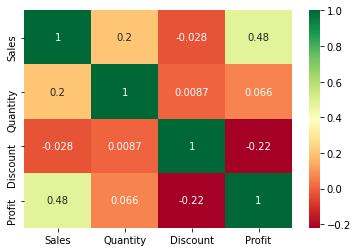

In [13]:
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn')
plt.show()

<b> Correlation table and heatmap for our data. Interesting that Discount has bad correlation with both Sales and Profit. </b> 

<h4 style="color:crimson;"> <li> <B>Order Count plots for different variables</B></li> </h4>

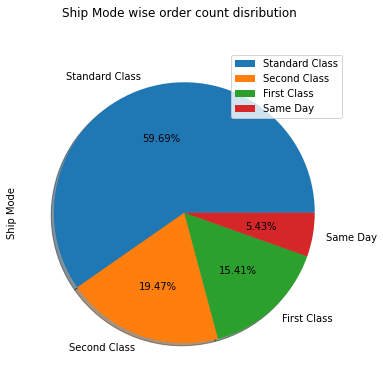

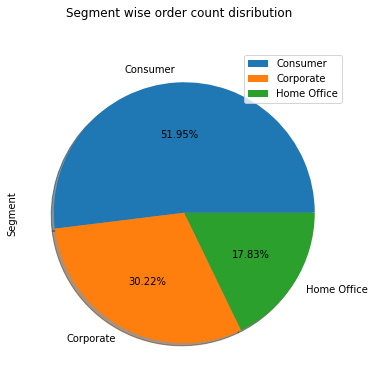

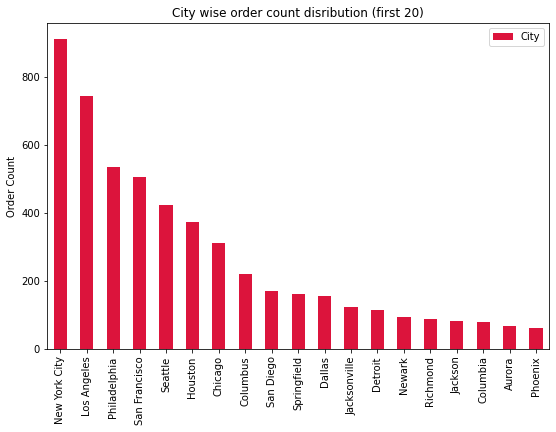

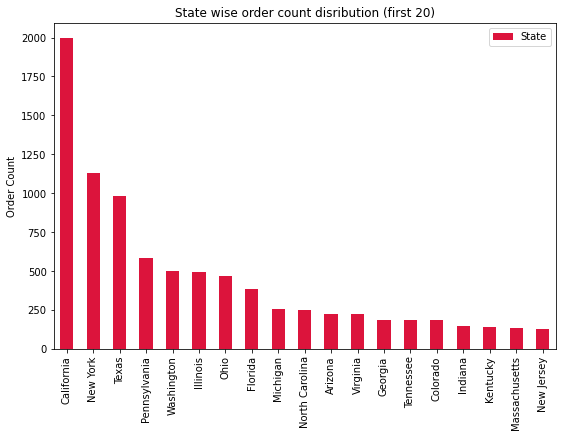

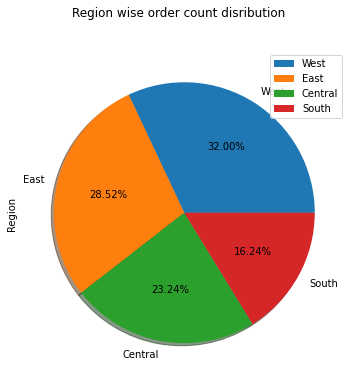

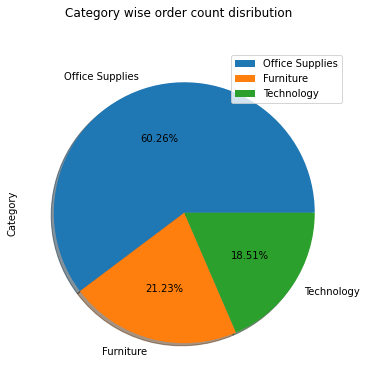

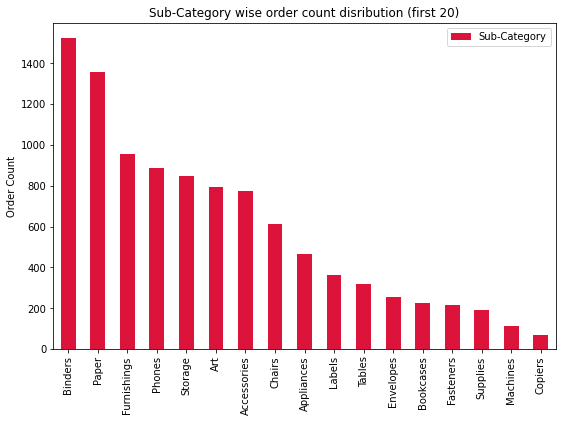

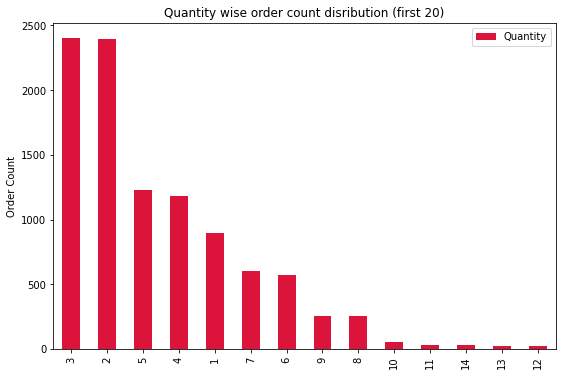

In [14]:
for column in data:
    if data[column].dtype == "object" and len(data[column].unique())<=5:
        data[column].value_counts().to_frame().plot(kind='pie', subplots=True, title=f"{column} wise order count disribution",autopct='%1.2f%%',shadow=True,figsize=(6, 6))
    elif data[column].dtype == "object" or column=="Quantity" and len(data[column].unique()) > 5:
        data[column].value_counts().to_frame().iloc[0:19,:].plot(kind='bar',title=f"{column} wise order count disribution (first 20)",figsize=(9, 6),color='crimson',ylabel="Order Count")
    else:
        pass
plt.show()

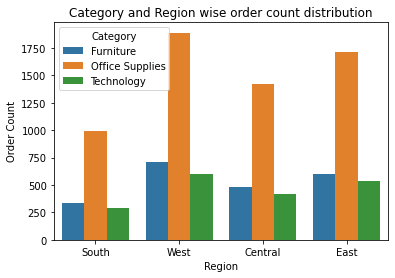

In [15]:
sns.countplot(x="Region",hue="Category", data=data)
plt.ylabel("Order Count")
plt.title("Category and Region wise order count distribution")
plt.show()

<b><li> From the above analysis we can see that Most of the Orders are Standard Class (59.7%).</li><br><li> Most of the orders are by consumers (54%) and least are from Home offices (18%).</li><br><li> Most of the orders are from New York City (914), followed by Los Angeles (746), Philadelphia, San Francisco, Seattle et cetera.</li><br><li>Statewise most of the orders are from California (1996), followed by New York (1127), Texas (983), Pensylvania, Washington et cetera.</li><br><li> Most orders are from West US and least from South US. So we are not that strong on Southern part of our country.</li><br><li> Most orders are for Office Suplies (60.3%), followed by Furniture (21.2%), and Technology (18.5%). We should work on our Technology and Furniture section to make them stronger.</li><br><li> Most orders are for Binders, Paper, Furnishings, Phones, Storage et cetera.</li><br><li>Most orders are for two or three products.</li> 
    

<h4 style="color:crimson;"> <li> <B>Regionwise Sales and Profit Data Analysis</B></li> </h4>

               Sales
Region              
Central  500782.8528
East     678435.1960
South    391721.9050
West     725255.6365




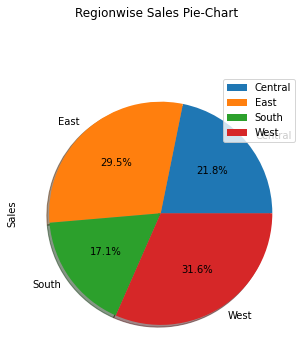

In [16]:
gr_1 = data[["Region","Sales"]]
data_gr1 = gr_1.groupby(gr_1["Region"],as_index=True).sum()
print(data_gr1)
print("")
print("")
data_gr1.plot(kind='pie',autopct='%1.1f%%',shadow=True,figsize=(5, 6),subplots=True,title="Regionwise Sales Pie-Chart")
plt.show()

              Profit
Region              
Central   39655.8752
East      91506.3092
South     46749.4303
West     108329.8079




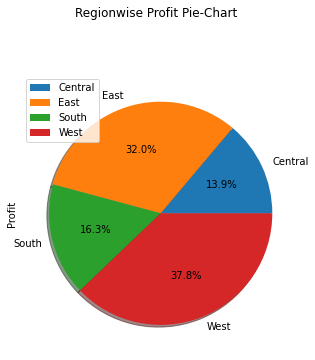

In [17]:
gr_2 = data[["Region","Profit"]]
data_gr2 = gr_2.groupby(gr_2["Region"],as_index=True).sum()
print(data_gr2)
print("")
print("")
data_gr2.plot(kind='pie',autopct='%1.1f%%',shadow=True,figsize=(5, 6),subplots=True,title="Regionwise Profit Pie-Chart")
plt.show()

<B>From above vizualizations we can see that our Sales are least in Southern US followed by Central US. And by profit we are weakest in Central US followed by Southern US. So let us narrow down to South and Central US and work on these regions. </B>

<h4 style="color:crimson;"> <li> <B>Statewise Sales and Profit Data Analysis (US-South)</B></li> </h4>

                    Sales
State                    
Alabama         19510.640
Arkansas        11678.130
Florida         89473.708
Georgia         49095.840
Kentucky        36591.750
Louisiana        9217.030
Mississippi     10771.340
North Carolina  55603.164
South Carolina   8481.710
Tennessee       30661.873
Virginia        70636.720

                    Profit
State                     
Alabama          5786.8253
Arkansas         4008.6871
Florida         -3399.3017
Georgia         16250.0433
Kentucky        11199.6966
Louisiana        2196.1023
Mississippi      3172.9762
North Carolina  -7490.9122
South Carolina   1769.0566
Tennessee       -5341.6936
Virginia        18597.9504



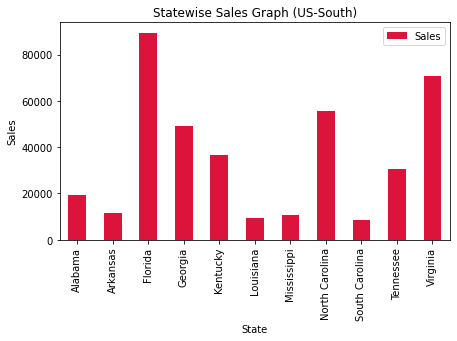

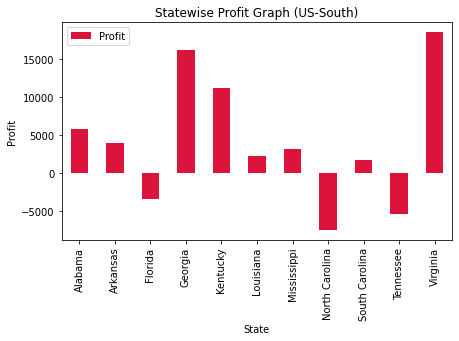

In [18]:
result_df1 = data[(data["Region"]=="South")]
gr_3 = result_df1[["State","Sales"]]
data_gr3 = gr_3.groupby(gr_3["State"],as_index = True).sum()
print(data_gr3)
print("")
data_gr3.plot(kind='bar',figsize=(7, 4),color='crimson', title="Statewise Sales Graph (US-South)",ylabel="Sales")

gr_4 = result_df1[["State","Profit"]]
data_gr4 = gr_4.groupby(gr_4["State"],as_index = True).sum()
print(data_gr4)
print("")
data_gr4.plot(kind='bar',figsize=(7, 4),color='crimson', title="Statewise Profit Graph (US-South)",ylabel="Profit")

plt.show()

<b> From the above vizualizations we can see our Sales and Profits are both very low in Arkansas, Lousiana, Mississippi and South Carolina so we should on those states. Intersting thing is that in Florida, North Carolina and Tennessee, even though our sales are high, we incurred loss. </b>

<h4 style="color:crimson;"> <li> <B>Statewise Sales and Profit Data Analysis (US-Central)</B></li> </h4>

                    Sales
State                    
Illinois       80162.5370
Indiana        53555.3600
Iowa            4579.7600
Kansas          2914.3100
Michigan       75879.6440
Minnesota      29863.1500
Missouri       22205.1500
Nebraska        7464.9300
North Dakota     919.9100
Oklahoma       19683.3900
South Dakota    1315.5600
Texas         170124.5418
Wisconsin      32114.6100

                  Profit
State                   
Illinois     -12601.6500
Indiana       18382.9363
Iowa           1183.8119
Kansas          836.4435
Michigan      24428.0903
Minnesota     10823.1874
Missouri       6436.2105
Nebraska       2037.0942
North Dakota    230.1497
Oklahoma       4853.9560
South Dakota    394.8283
Texas        -25750.9833
Wisconsin      8401.8004



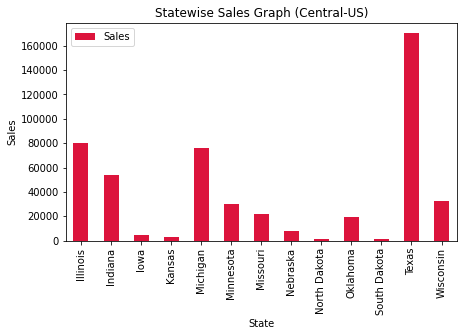

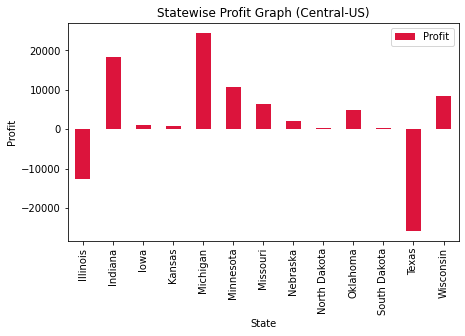

In [19]:
result_df2 = data[(data["Region"]=="Central")]

gr_5 = result_df2[["State","Sales"]]
data_gr5 = gr_5.groupby(gr_5["State"],as_index = True).sum()
print(data_gr5)
print("")
data_gr5.plot(kind='bar',figsize=(7, 4),color='crimson', title="Statewise Sales Graph (Central-US)",ylabel="Sales")

gr_6 = result_df2[["State","Profit"]]
data_gr6 = gr_6.groupby(gr_6["State"],as_index = True).sum()
print(data_gr6)
print("")
data_gr6.plot(kind='bar',figsize=(7, 4),color='crimson', title="Statewise Profit Graph (Central-US)",ylabel="Profit")

plt.show()

<b> From the above vizualizations we can see our Sales and Profits are both very low in Iowa, Kansas, Nebraska, North Dakota and South Dakota so we should work on those states. Intersting thing is that in Illinois, and Texas  even though our sales are high, we incurred loss. </b>

<h4 style="color:crimson;"> <li> <B>Citywise Sales and Profit Data Analysis (South and Central US)</B></li> </h4>

               Sales
City                
Abilene        1.392
Jupiter        2.064
Pensacola      2.214
Ormond Beach   2.808
Springdale     4.300
Keller         6.000
Missouri City  6.370
Deer Park      6.924
Port Orange    7.824
Romeoville     8.952

                  Profit
City                    
Houston      -10175.1755
San Antonio   -7299.0502
Chicago       -6648.3318
Burlington    -5867.8555
Dallas        -2846.5257
Jacksonville  -2323.8350
Aurora        -1894.7196
Concord       -1788.6868
Memphis       -1479.0400
Round Rock    -1183.4313




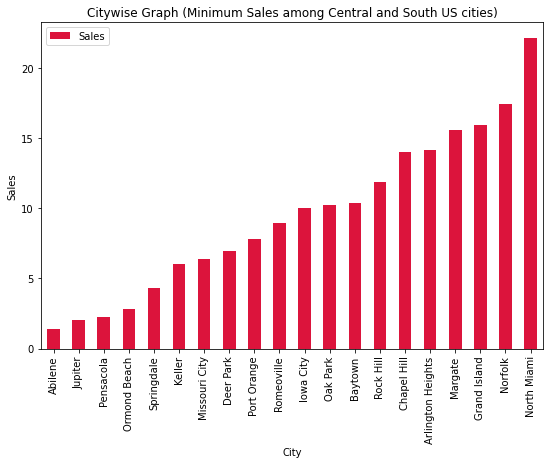

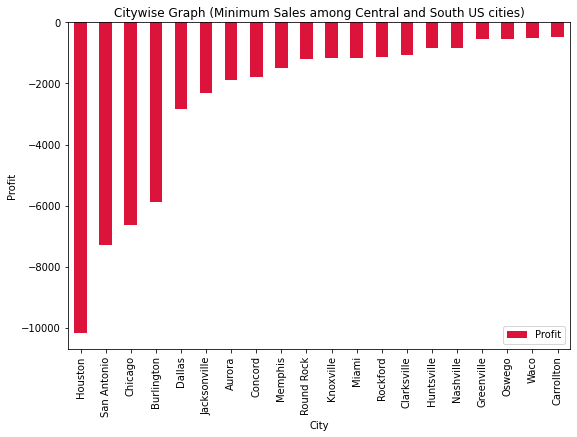

In [20]:
com_df = pd.concat([gr_4,gr_6],axis=0)
gr_com=com_df.groupby("State").sum()

options = []
for k in range(len(gr_com.values.reshape(-1))):
    if gr_com.values.reshape(-1)[k] < 4009:
        options.append(gr_com.index[k])       

rslt_df3 = data[data['State'].isin(options)]

gr_7= rslt_df3[["City","Sales"]]
data_gr7 = gr_7.groupby(gr_7["City"],as_index = True).sum()
sorted_gr7 = data_gr7.sort_values(by='Sales')
print(sorted_gr7.head(10))
print("")
sorted_gr7.head(20).plot(kind='bar',figsize=(9, 6),color='crimson', title="Citywise Graph (Minimum Sales among Central and South US cities)",ylabel="Sales")

gr_8= rslt_df3[["City","Profit"]]
data_gr8 = gr_8.groupby(gr_8["City"],as_index = True).sum()
sorted_gr8 = data_gr8.sort_values(by='Profit')
print(sorted_gr8.head(10))
print("")
print("")
sorted_gr8.head(20).plot(kind='bar',figsize=(9, 6),color='crimson', title="Citywise Graph (Minimum Sales among Central and South US cities)",ylabel="Profit")

plt.show()

In [21]:
loss = 0 
for p in sorted_gr8["Profit"].values:
    if p <0:
        loss += 1
print(loss)

89


<br><li> We incurred losses in 89 cities in the following states of South or Central US:</li> Iowa, Kansas, Nebraska, North Dakota, South Dakota, Illinois, Texas, Arkansas, Lousiana, Mississippi, South Carolina, Florida, North Carolina, Tennessee.<br><br><li> Least Sales are from following cities:</li> Abilene, Keller, MissouriCity, Deer Park, Romeoville, Iowa City, Baytown, Arlington Heights, Grand Island, Portage et cetera.<br><br><li> The cities where we incurred most losses are:<br> Houston, San Antonio, Chicago, Dallas, Aurora, Round Rock, Rockford, Huntsville, Oswego, Waco.</li><b>

<h4 style="color:crimson;"> <li> <B>Some other analysis</B></li> </h4>

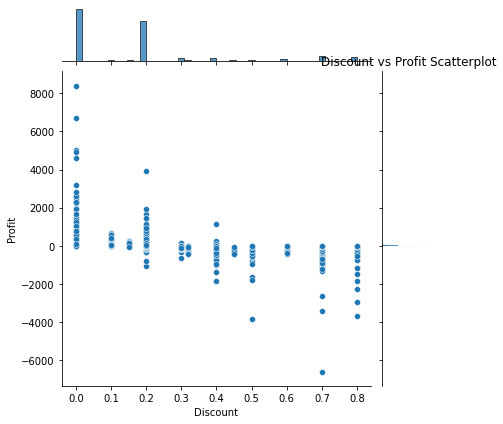

In [22]:
sns.jointplot(x="Discount",y="Profit",data=data)
plt.title("Discount vs Profit Scatterplot")
plt.show()

<b>From the above visualization we can see that either (>20%) discount effects in loss or storerunners sell products in (>20%) discounted price when their profits are not good enough or negative. </b>

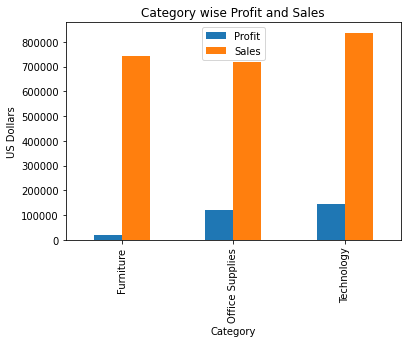

In [23]:
gr_9 = data.groupby(["Category"])[['Profit','Sales']].agg('sum')
gr_9.plot(kind='bar',ylabel="US Dollars",title="Category wise Profit and Sales")
plt.show()

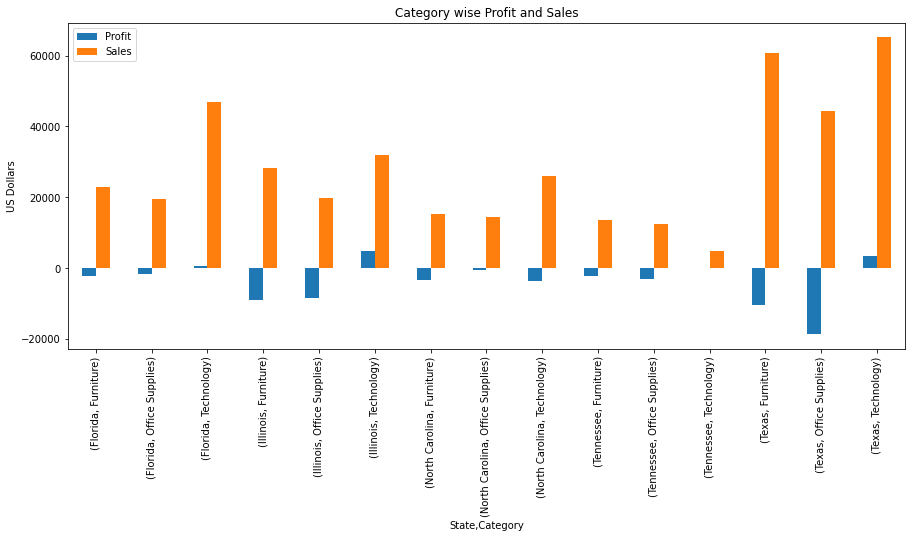

In [24]:
options2 = ['Florida','North Carolina', 'Texas', 'Tennessee','Illinois']
rslt_df_ = data[data['State'].isin(options2)]
gr_10 = rslt_df_.groupby(["State","Category"])[['Profit','Sales',"Category"]].agg('sum')
gr_10.plot(kind='bar',ylabel="US Dollars",title="Category wise Profit and Sales",figsize=(15,6))
plt.show()


<li><b> Even though previously we saw that Technology related order are least, it is now evident now most of our Profit and Sales are from them. So we should make our technology section stronger for even more profit. </b></li>

<li><b> In the sates like Florida,North Carolina, Texas, Tennessee, Illinois where are our Sales are high but still we incurred loss, we observe that selling Furnitures and office suplies are not really profitable where as selling Technology related items are profitable most of the time.</b></li>

<h2 style="color:purple;"><B>Conclusions</B> </h2>

<li><b> Our Sales from corporetes and home-offices are low, we should campaign or targeted advertisement to attract them. </b></li><br><li><b> Even though order counts for technology products are low, most of our Sales and Profit comes from them. So we should further strengthen our tech section. </b></li><br><li><b> Our Sales are weak in Central and South US, let us narrow down on these regions. </b></li><br><li><b>  Our Sales and Profits are both very low in Arkansas, Lousiana, Mississippi and South Carolina, Iowa, Kansas, Nebraska, North Dakota and South Dakota so we should do marketing campaings in these states. </b></li><br><li><b> Intersting thing is that in Florida, North Carolina and Tennessee, Illinois, and Texas, even though our sales are high, we incurred loss. Only technoglogy products are profitable here, so we should focus on tech products in these states. </b></li><br><li><b> Our sales are really lackluster in cities like Abilene, Keller, MissouriCity, Deer Park, Romeoville, Iowa City, Baytown, Arlington Heights, Grand Island, Portage et cetera, Some advertisement should work. </b></li><br><li><b> We suffered heavy loss in cities like Houston, San Antonio, Chicago, Dallas, Aurora, Round Rock, Rockford, Huntsville, Oswego, Waco. We should focus on technology related products in these cities and try to maintain positive profit. </b></li><br><li><b> We should stick with 0-20% discount, more discounts are not really profitable.</b></li>